<a href="https://colab.research.google.com/github/muskaanramchandani/tema1-trabalho-redes-neurais/blob/main/Tema1_Trabalho2_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Inicialização do Ambiente e Dependências Essenciais**
Esta célula é dedicada ao carregamento de todas as bibliotecas necessárias para o projeto e à verificação do ambiente.

* **`import sys`**: Usado para imprimir a versão do Python.

* **`import pandas as pd`**: Importa a biblioteca para manipulação de dados.

* **`import numpy as np`**: Importa a base para operações numéricas e matriciais de alta performance.

* **`import matplotlib.pyplot as plt`**: Importa a biblioteca base para a criação de gráficos estáticos.

* **`import seaborn as sns`**: Importa a biblioteca de alto nível para gráficos estatísticos.

* **`from sklearn.model_selection import train_test_split`**: Importa a função para dividir os dados.

* **`from sklearn.preprocessing import StandardScaler`**: Importa a função para padronizar as features.

* **`from sklearn.metrics...`**: Importa as métricas para avaliação do modelo.

* **`from tensorflow import keras`**: Importa a API de alto nível para Redes Neurais.

A impressão das versões é uma boa prática que assegura a reprodutibilidade do experimento.

## **2. Importação das Bibliotecas Fundamentais e Verificação de Versões**
Esta célula carrega as bibliotecas essenciais para o fluxo de trabalho de Machine Learning e Deep Learning.

* **`pandas`**: Utilizada para a leitura e manipulação de dados em formato de DataFrame. É a principal ferramenta para carregar o arquivo .csv e realizar a análise exploratória.

* **`numpy`**: Fornece a base para operações numéricas e matriciais de alta performance. O Keras, por baixo dos panos, depende do NumPy para processar os dados.

* **`sklearn (Scikit-learn)`**: A biblioteca padrão para Machine Learning em Python. Neste projeto, ela é fundamental para:

* **`train_test_split`**: Dividir nossos dados em conjuntos de treino e teste.

* **`StandardScaler`**: Realizar a normalização das features, um passo crítico para redes neurais.

* **`keras`**: A API de alto nível (agora parte do TensorFlow) que usaremos para construir, compilar e treinar nossa Rede Neural Artificial (ANN).

* **`sys`**: Usado aqui para imprimir a versão do Python.

A impressão das versões (__version__) é uma boa prática que assegura a reprodutibilidade do experimento, registrando o ambiente exato em que o código foi executado.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow import keras # Import Keras from TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

print(f'Python: {sys.version.split()[0]}')
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Keras: {keras.__version__}') # Print Keras version using the imported name

Python: 3.12.12
Pandas: 2.2.2
Numpy: 2.0.2
Seaborn: 0.13.2
Keras: 3.10.0


## **3. Configuração do Ambiente de Visualização**
Esta etapa é crucial para garantir que todos os gráficos gerados no projeto tenham uma aparência consistente e profissional, facilitando a análise.

Importamos matplotlib.pyplot e seaborn, as duas principais bibliotecas de visualização em Python.

* **`matplotlib`**: A biblioteca base para a criação de gráficos estáticos.

* **`seaborn`**: Construída sobre o matplotlib, ela oferece uma interface de mais alto nível para gráficos estatísticos complexos, como a matriz de correlação (heatmap) e gráficos de distribuição.

* **`sns.set_style("whitegrid")`**: Define um estilo visual limpo e profissional (fundo branco e grades) para todos os gráficos subsequentes.

In [2]:
# Aplicando o estilo de visualização
sns.set_style("whitegrid")

## **4. Upload e Limpeza dos Dados (Data Wrangling)**
Esta seção carrega o conjunto de dados (**`heart.csv`**) e realiza as etapas iniciais de limpeza para prepará-lo para a modelagem.

* Tratamento de Arquivo: Utiliza **`pd.read_csv`** com um bloco **`try...except`** para garantir que o arquivo seja carregado.

* Remoção de Ausentes: Remove marcadores de ausência (**`?`**) e linhas com valores NaN (**`df.dropna`**).

* Conversão de Tipo: Garante que todas as colunas sejam numéricas (**`df.apply(pd.to_numeric)`**).

* Remoção de Duplicatas: Remove quaisquer linhas que representem pacientes idênticos no dataset.

In [3]:
# PARTE 1. UPLOAD E LIMPEZA DOS DADOS
print("\n--- 1. Upload e Limpeza ---")
# OBS: Arquivo renomeado para 'heart.csv' para melhor compatibilidade com pd.read_csv
try:
    df = pd.read_csv('../content/heart.csv')
except FileNotFoundError:
    print("ERRO: Certifique-se de que o arquivo 'heart.csv' está no diretório correto.")
    sys.exit()

print(f"Shape Inicial: {df.shape}")

# Remoção de marcadores de ausência ('?') e linhas com NaN
df = df[~df.isin(['?'])]
df = df.dropna(axis=0)
print(f"Shape após limpeza de ausentes: {df.shape}")

# Garantir que todas as colunas sejam do tipo numérico
df = df.apply(pd.to_numeric)
print("Tipos de Dados convertidos para numérico.")

# Remoção de linhas duplicadas (pacientes idênticos)
df = df.drop_duplicates()
print(f"Shape após remover duplicatas: {df.shape}")


--- 1. Upload e Limpeza ---
Shape Inicial: (1025, 14)
Shape após limpeza de ausentes: (1025, 14)
Tipos de Dados convertidos para numérico.
Shape após remover duplicatas: (302, 14)


## **5. Inspeção e Visualização**
Realizamos uma Análise Exploratória de Dados (EDA) para entender a distribuição e as relações entre as variáveis.

* **`df.describe()`**: Exibe as estatísticas descritivas (média, desvio padrão, etc.) do conjunto de dados.

* **`Mapa de Calor (Heatmap)`**: Utiliza sns.heatmap para plotar a matriz de correlação. Este mapa é crucial para identificar correlações fortes entre a variável alvo e as features.


--- 2. Análise Exploratória e Visualização ---
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    

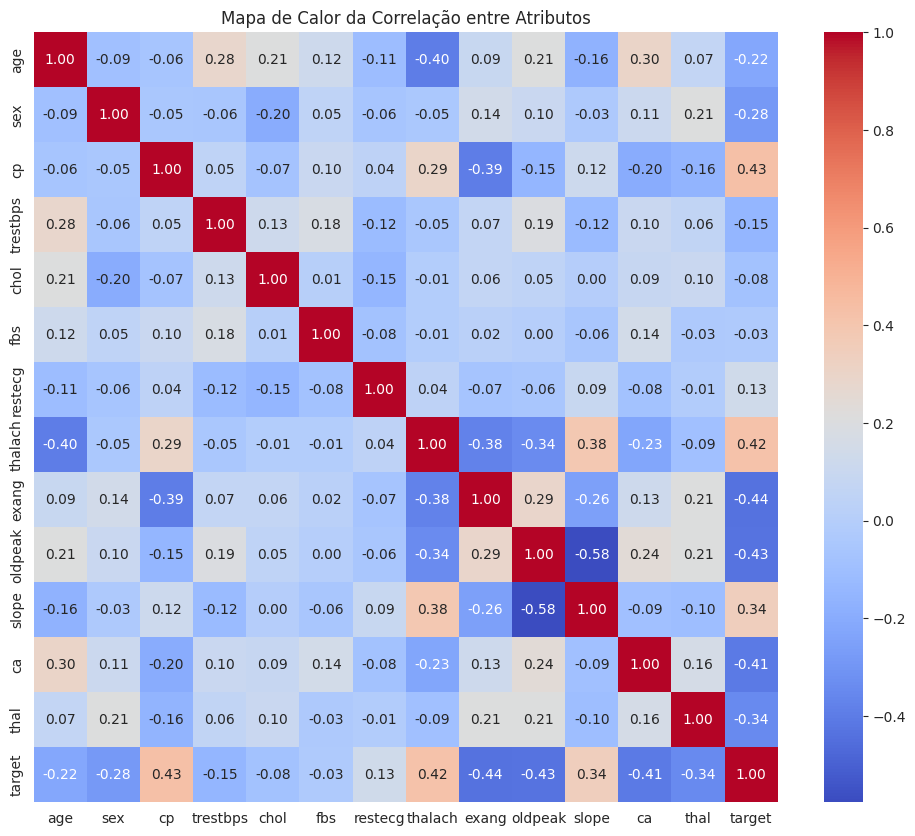

In [4]:
# PARTE 2. INSPEÇÃO E VISUALIZAÇÃO
print("\n--- 2. Análise Exploratória e Visualização ---")
print(df.describe())

# Mapa de Calor para a correlação dos atributos
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Atributos')
plt.show()

## **6. Preparação para o Modelo Binário**
Esta etapa finaliza o pré-processamento, estruturando os dados para a Rede Neural.

**Definição X e y**: Separa o conjunto de dados em Características (**`X`**) e Variável Alvo (**`y`**).

**Divisão Treino/Teste**: A função train_test_split divide o dataset (**80% para treino, 20% para teste**) e usa **`stratify=y`** para manter a proporção das classes.

**Padronização** (**`StandardScaler`**): Transforma os dados para que tenham média zero e desvio padrão unitário, essencial para otimizar o treinamento da ANN.

In [5]:
# PARTE 3. PREPARAÇÃO PARA O MODELO BINÁRIO

# DEFINIÇÃO: Variável Alvo (y): 0 (Ausência) ou 1 (Presença) de doença cardíaca
y = df['target'].copy()
X = df.drop('target', axis=1).copy()

# Assegura que 'target' seja estritamente binário (0 ou 1)
y[y > 0] = 1

# Separação dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nDados Treino: {X_train.shape}, Dados Teste: {X_test.shape}")

# Aplicação do Standard Scaler às características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Dados Padronizados (StandardScaler).")


Dados Treino: (241, 13), Dados Teste: (61, 13)
Dados Padronizados (StandardScaler).


## **7. Definição e Execução do Treinamento**
O código define a arquitetura da Rede Neural Artificial (ANN) e inicia o processo de aprendizado.

**Arquitetura**: O modelo **`Sequential`** é construído com camadas **`Dense`** e ativação **ReLU** nas camadas ocultas.

**Regularização**: Uso de *L2* regularizer e camadas de **`Dropout(0.25)`** para **prevenir o overfitting.**

**Camada de Saída**: Usa **1 neurônio** com ativação **Sigmoide** para classificação binária.

**Treinamento**: O modelo é ajustado aos dados por **50 épocas** usando o otimizador **`rmsprop`** e a perda **`binary_crossentropy`**.

In [6]:
# PARTE 4. DEFINIÇÃO E EXECUÇÃO DO TREINAMENTO

def create_binary_model(input_dim):
    # ESTRUTURA: Modelo ANN feedforward com camadas densas
    model = Sequential()

    # CAMADA 1: 16 neurônios, ReLU e L2
    model.add(Dense(16, input_dim=input_dim, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25)) # Regularização (Dropout)

    # CAMADA 2: 8 neurônios, ReLU e L2
    model.add(Dense(8, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))

    # CAMADA FINAL: 1 neurônio, Sigmoide para o resultado binário
    model.add(Dense(1, activation='sigmoid'))

    # CONFIGURAÇÃO: Compilação do modelo com perda e otimizador
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

# INSTANCIAÇÃO: Criação da arquitetura da rede neural
binary_model = create_binary_model(X_train_scaled.shape[1])
print("\n--- 4. Sumário do Modelo Binário ---")
binary_model.summary()

# TREINAMENTO: Ajuste dos pesos da rede
history = binary_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=10,
    verbose=0 # AJUSTE: Mude para 1 para visualizar o progresso
)
print("Treinamento concluído.")


--- 4. Sumário do Modelo Binário ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

Treinamento concluído.


## **8. Medição de Desempenho**
A última etapa avalia o modelo no conjunto de teste usando gráficos e métricas padrão de classificação.

* **Gráficos Históricos**: Plotagem da **Acurácia** e da **Perda (Loss)** nos conjuntos de Treino e Teste para diagnosticar o treinamento.

* **Métricas Finais**: Calcula e imprime a **Acurácia** e o **Relatório de Classificação** *(Precision, Recall, F1-Score)*.

* **Matriz de Confusão**: O *heatmap* visualiza os **acertos e erros** do modelo (Verdadeiros Positivos, Falsos Negativos, etc.).

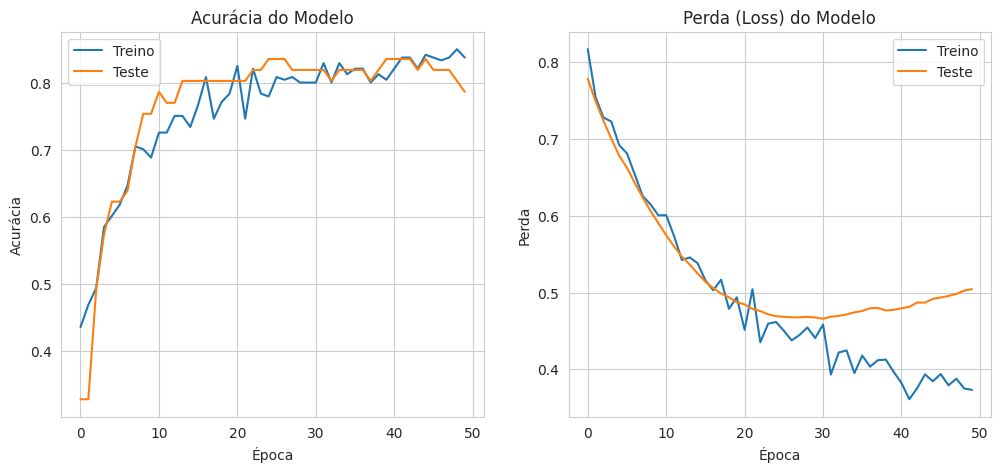

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

--- 5. Resultados Finais e Métricas (Conjunto de Teste) ---
Acurácia: 0.7869

Relatório de Classificação (Precisão, Recall, F1-Score):

                precision    recall  f1-score   support

0 (Sem Doença)       0.80      0.71      0.75        28
1 (Com Doença)       0.78      0.85      0.81        33

      accuracy                           0.79        61
     macro avg       0.79      0.78      0.78        61
  weighted avg       0.79      0.79      0.79        61



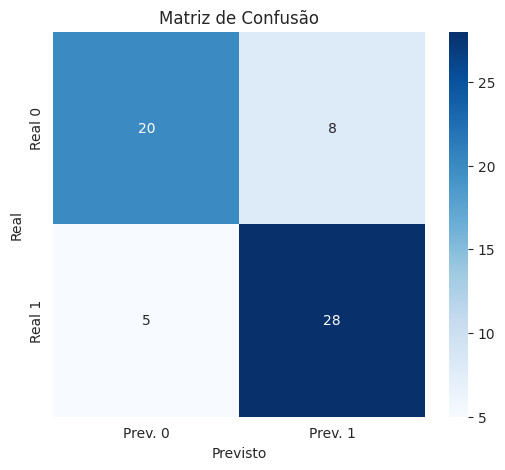

In [7]:
# PARTE 5. MEDIÇÃO DE DESEMPENHO

# 5.1 VISUALIZAÇÃO: Gráficos da Acurácia e Perda ao longo das épocas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Teste')
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Teste')
plt.title('Perda (Loss) do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()
plt.show()

# 5.2 PREVISÃO: Geração das probabilidades e classes binárias
y_pred_prob = binary_model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob).astype(int)

# 5.3 RESULTADOS: Impressão da acurácia e relatório de classificação
print("\n--- 5. Resultados Finais e Métricas (Conjunto de Teste) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_binary):.4f}")
print("\nRelatório de Classificação (Precisão, Recall, F1-Score):\n")
print(classification_report(y_test, y_pred_binary, target_names=['0 (Sem Doença)', '1 (Com Doença)']))

# 5.4 AVALIAÇÃO: Visualização da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prev. 0', 'Prev. 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()